### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from plotnine import *

from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
CC_data = pd.read_csv("CC GENERAL.csv", index_col = "CUST_ID")
CC_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
CC_data.fillna(CC_data.median(),inplace = True)
CC_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Scaling the data using min max scaler

In [4]:
minMax_scaler = MinMaxScaler()

In [5]:
sc_data = minMax_scaler.fit_transform(CC_data)

In [6]:
sc_df = pd.DataFrame(sc_data)
sc_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

### T-sne

In [7]:
gm_df = sc_df.copy()

In [8]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300 , random_state=42)
tsne_results = tsne.fit_transform(gm_df)
gm_df['tsne-2d-one'] = tsne_results[:,0]
gm_df['tsne-2d-two'] = tsne_results[:,1]

#### Applying EM

In [9]:
gm = GaussianMixture(n_components=2, random_state=0).fit(gm_df)
gm_scores = gm.score_samples(gm_df)
gm_scores

array([23.66028517, 40.99245332, 34.91879825, ..., 14.30514085,
       36.60707439,  4.39685358])

In [10]:
threshold = np.quantile(gm_scores,0.03)

In [11]:
anomaly_score = [1 if x > threshold else -1 for x in gm_scores]

In [12]:
np.unique(anomaly_score)

array([-1,  1])

In [13]:
gm_df['y'] = anomaly_score
print(gm_df["y"].value_counts())

 1    8681
-1     269
Name: y, dtype: int64


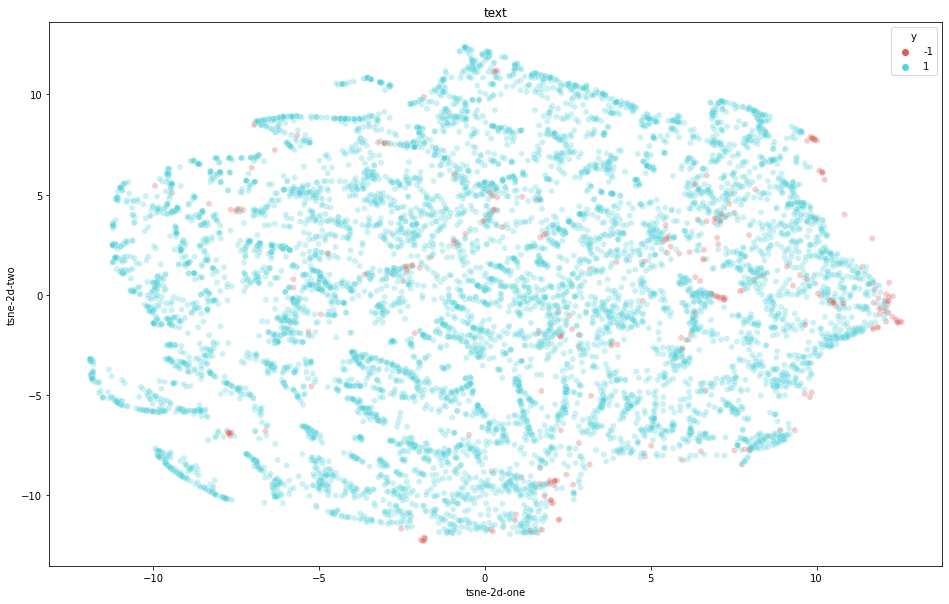

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(
        x='tsne-2d-one', y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls",2),
        data= gm_df,
        legend="full",
        alpha=0.3
        ).set(title= 'text');